In [118]:
import pandas as pd
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

In [96]:
im = np.array(Image.open('check/Fig3.27(a).BMP'))

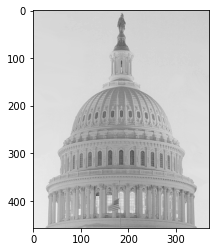

In [97]:
plt.imshow(im, cmap='gray', vmin=0, vmax=255)

In [98]:
im

array([[206, 214, 207, ..., 204, 204, 205],
       [208, 211, 210, ..., 204, 203, 205],
       [208, 210, 210, ..., 202, 203, 203],
       ...,
       [236, 236, 236, ..., 229, 228, 228],
       [237, 236, 236, ..., 228, 228, 228],
       [236, 236, 236, ..., 228, 228, 228]], dtype=uint8)

In [99]:
im.shape

(457, 370)

## Поэлементные преобразования над изображениями

### Добавление целочисленной константы

In [100]:
rg = np.random.default_rng(1)
a = rg.integers(low=-255, high=256, size=im.shape) # low - inclusive, high - exclusive
a

array([[ -14,    6,  130, ...,  207,  -60, -247],
       [ 148, -100,  -31, ...,  -31, -193,   68],
       [ 232,  -61,  -25, ...,  165, -118, -102],
       ...,
       [ -81,  -68,  -45, ...,  247,  236,  -82],
       [-255, -202,  209, ...,  194,   69,  199],
       [ -64, -254, -163, ...,  -15,  -99,  114]])

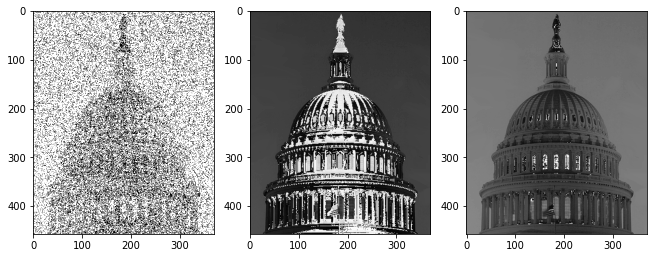

In [101]:
fig = plt.figure(figsize=(11, 11))
fig.add_subplot(1, 3, 1)
plt.imshow(im + a, cmap='gray', vmin=0, vmax=255) # using random values
fig.add_subplot(1, 3, 2)
plt.imshow(im + 100 * np.ones((im.shape), dtype='uint8'), cmap='gray', vmin=0, vmax=255) # using constant
fig.add_subplot(1, 3, 3)
plt.imshow(im - 100 * np.ones((im.shape), dtype='uint8'), cmap='gray', vmin=0, vmax=255)
plt.show()

### Преобразование в негатив

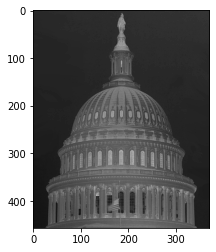

In [103]:
plt.imshow(255 - im, cmap='gray', vmin=0, vmax=255)

### Умножение на константу

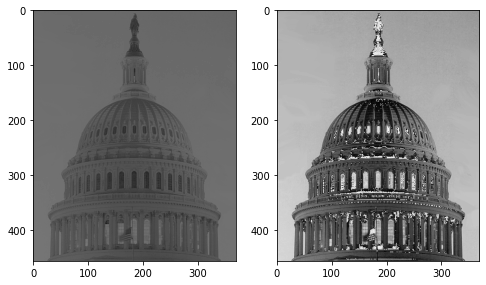

In [104]:
fig = plt.figure(figsize=(8, 8))
fig.add_subplot(1, 2, 1)
plt.imshow(im * 0.5, cmap='gray', vmin=0, vmax=255)
fig.add_subplot(1, 2, 2)
plt.imshow(im * 2, cmap='gray', vmin=0, vmax=255)
plt.show()

### Степенные преобразования

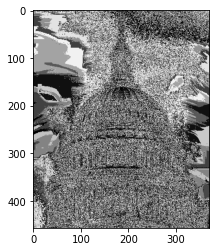

In [105]:
plt.imshow(im ** 2, cmap='gray', vmin=0, vmax=255)

### Логарифмические преобразования

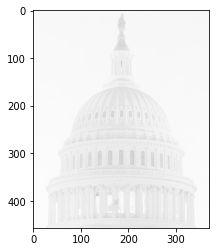

In [111]:
plt.imshow(255 * np.log(1 + im) / np.log(1 + np.amax(im)), cmap='gray', vmin=0, vmax=255)

## Линейное контрастирование

In [79]:
im1 = np.array(Image.open('check/Fig3.15(a)3.bmp'))

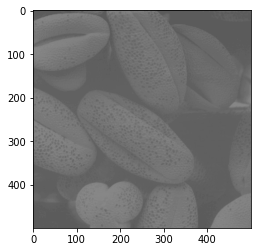

In [91]:
plt.imshow(im1, cmap='gray', vmin=0,vmax=255)

In [81]:
im1

array([[ 91,  91,  91, ..., 107, 107, 105],
       [ 91,  91,  91, ..., 107, 105, 104],
       [ 91,  91,  91, ..., 103, 103, 101],
       ...,
       [ 95,  91,  91, ..., 122, 120, 121],
       [ 97,  93,  91, ..., 121, 120, 119],
       [ 98,  96,  91, ..., 120, 121, 117]], dtype=uint8)

In [82]:
im1.shape

(500, 500)

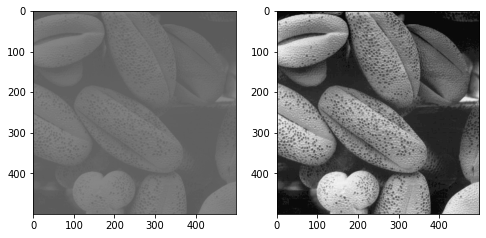

In [93]:
fig = plt.figure(figsize=(8, 8))
fig.add_subplot(1, 2, 1)
plt.imshow(im1, cmap='gray', vmin=0, vmax=255)
fig.add_subplot(1, 2, 2)
plt.imshow(255 / (np.amax(im1) - np.amin(im1)) * (im1 - np.amin(im1)), cmap='gray', vmin=0,vmax=255)
plt.show()

## Глобальная пороговая обработка

In [112]:
im2 = np.array(Image.open('check/Fig10.29(a).bmp'))

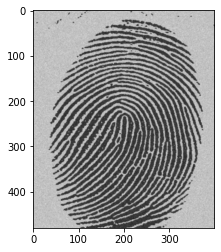

In [113]:
plt.imshow(im2, cmap='gray', vmin=0, vmax=255)

In [135]:
im2

array([[205, 201, 204, ..., 191, 188, 193],
       [200, 204, 199, ..., 194, 199, 187],
       [214, 204, 196, ..., 189, 206, 203],
       ...,
       [193, 190, 189, ..., 204, 208, 188],
       [189, 198, 198, ..., 210, 207, 192],
       [202, 205, 197, ..., 201, 202, 201]], dtype=uint8)

In [136]:
im2.shape

(480, 400)

### Использование гистограммы

<AxesSubplot:>

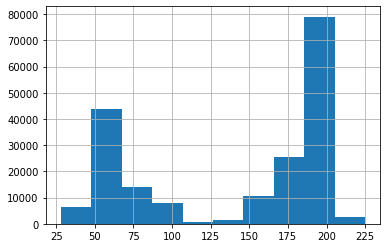

In [128]:
pd.Series(im2.flat).hist()

In [182]:
t = 50     # intial estimate of the threshold value (125 better)
e = 0.001  # epsilon

In [184]:
# first iteration
G1 = im2[im2 > t]
G2 = im2[im2 <= t]
mi1 = np.average(G1)
mi2 = np.average(G2)
t_new = (mi1 + mi2) / 2

while np.abs(t_new - t) > e:
    t = t_new
    G1 = im2[im2 > t]
    G2 = im2[im2 <= t]
    mi1 = np.average(G1)
    mi2 = np.average(G2)
    t_new = (mi1 + mi2) / 2

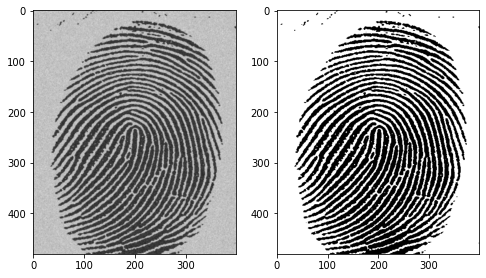

In [190]:
fig = plt.figure(figsize=(8, 8))
fig.add_subplot(1, 2, 1)
plt.imshow(im2, cmap='gray', vmin=0, vmax=255)
fig.add_subplot(1, 2, 2)
plt.imshow(np.where(im2 > t_new, 1, 0), cmap='gray')
plt.show()

### Метод Отсу

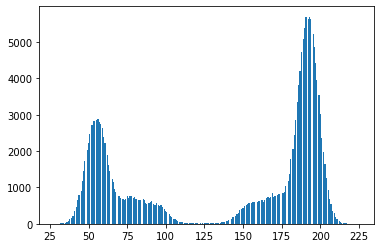

In [422]:
# histogram normalization
values = plt.hist(im2.flat, bins=256)
plt.show()

In [423]:
hist = values[0] / (im2.shape[0] * im2.shape[1]) # from hist

In [465]:
im2_flat = np.array(im2.flat)
hist1 = np.array([0] * 256, dtype='double') # custom

In [466]:
for i in im2_flat:
    hist1[i] += 1
hist1 /= (im2.shape[0] * im2.shape[1])

In [467]:
sum(hist1)

0.9999999999999999

In [468]:
def S(t):
    P1 = sum(hist1[:t])
    if P1 == 0:
        return 0
    P2 = 1 - P1
    M1 = sum(i * h for i, h in enumerate(hist1[:t])) / P1
    M2 = sum(i * h for i, h in enumerate(hist1[t:])) / P2
    return P1 * P2 * (M1 - M2) ** 2

In [469]:
S_arr = [S(i) for i in range(1, 256)]
t = S_arr.index(max(S_arr))
t

191

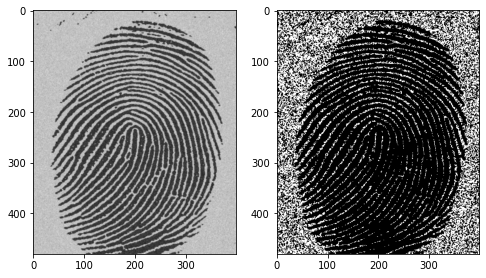

In [470]:
fig = plt.figure(figsize=(8, 8))
fig.add_subplot(1, 2, 1)
plt.imshow(im2, cmap='gray', vmin=0, vmax=255)
fig.add_subplot(1, 2, 2)
plt.imshow(np.where(im2 > t, 1, 0), cmap='gray')
plt.show()

## Адаптивная пороговая обработка

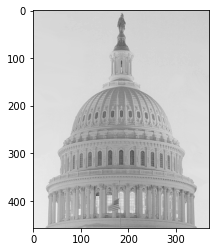

In [473]:
plt.imshow(im,cmap='gray', vmin=0, vmax=255)

In [566]:
im

array([[206, 214, 207, ..., 204, 204, 205],
       [208, 211, 210, ..., 204, 203, 205],
       [208, 210, 210, ..., 202, 203, 203],
       ...,
       [236, 236, 236, ..., 229, 228, 228],
       [237, 236, 236, ..., 228, 228, 228],
       [236, 236, 236, ..., 228, 228, 228]], dtype=uint8)

In [567]:
im3 = np.pad(im, 1)

In [568]:
im3

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0, 206, 214, ..., 204, 205,   0],
       [  0, 208, 211, ..., 203, 205,   0],
       ...,
       [  0, 237, 236, ..., 228, 228,   0],
       [  0, 236, 236, ..., 228, 228,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

In [569]:
im3_res = np.copy(im3)

In [576]:
def calc_t(m, n, K = 1, a = 1 / 3):    
    temp_arr = [im3[m+i][n+j] for i in range(-K, K+1) for j in range(-K, K+1)]
    f_max = max(temp_arr)
    f_min = min(temp_arr)
    P_ = 1 / (2 * K + 1) ** 2 * sum(temp_arr)
    d_f_max = np.abs(f_max - P_)
    d_f_min = np.abs(f_min - P_)
    
    if d_f_max > d_f_min:
        return a * (2 / 3 * f_min + 1 / 3 * P_), K
    if d_f_max < d_f_min:
        return a * (1 / 3 * f_min + 2 / 3 * P_), K
    if d_f_max == d_f_min and f_max != f_min:
        return calc_t(m, n, K = K + 1)
    return a * P_, K

In [563]:
def calc_P_l(m, n, K):
    return 1 / (2 * K + 1) ** 2 * sum(im3[m+i][n+j] for i in range(-K, K+1) for j in range(-K, K+1))

In [574]:
for m in range(1, im.shape[0] + 1):
    for n in range(1, im.shape[1]):
        f = False
        t, K = calc_t(m, n)
        
        temp_arr = [(i, j) for i in range(-1, 2) for j in range(-1, 2) if j != 0 or i != 0]
        for l in temp_arr:
            if np.abs(calc_P_l(m + l[0], n + l[1], K) - im3[m][n]) <= t:
                im3_res[m][n] = 0
                f = True; break
        if f:
            continue
        im3_res[m][n] = 1

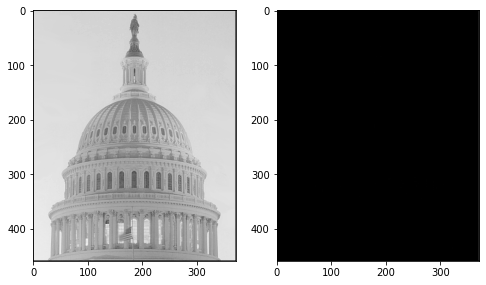

In [575]:
fig = plt.figure(figsize=(8, 8))
fig.add_subplot(1, 2, 1)
plt.imshow(im3, cmap='gray', vmin=0, vmax=255)
fig.add_subplot(1, 2, 2)
plt.imshow(im3_res, cmap='gray', vmin=0, vmax=255)
plt.show()

In [556]:
im3_res

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0, 205,   0],
       [  0,   0,   0, ...,   0, 205,   0],
       ...,
       [  0,   0,   0, ...,   0, 228,   0],
       [  0,   0,   0, ...,   0, 228,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

In [516]:
calc_t(100, 12)

(145.33333333333331, 1)

In [560]:
np.abs(calc_P_l(100 + 1, 25 + 1, K) - im3[m][n])

10.0